<a href="https://colab.research.google.com/github/Renanvictordiascosta/Atividade-Avaliativa-CNA/blob/main/BiD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.sparse import diags
from scipy.sparse import kron

# Uso de uma função para realizar a construção da matriz A
def DDM_LaplaceDirichlet(a1, a2, n1, n2, h):
    # Número total de pontos na grade
    N = n1 * n2

    # Tamanho das submatrizes tridiagonais
    size = n1
    diagonals = [np.ones(size - 1), -4 * np.ones(size), np.ones(size - 1)]
    offsets = [-1, 0, 1]

    # Matriz tridiagonal T de tamanho n1 x n1
    T = diags(diagonals, offsets, shape=(size, size)).toarray()

    # Matriz de identidade de tamanho n1 x n1
    I = np.eye(size)

    # Construindo a matriz A de tamanho n1*n2 x n1*n2
    A = kron(T, np.eye(n2)) + kron(np.eye(n1), T)

    return A

# Exemplo de uso da função
a1 = 0.0
a2 = 1.0
n1 = 3
n2 = 3
h = (a2 - a1) / (n1 - 1)


# Matriz A recebendo o retorno da função
A = DDM_LaplaceDirichlet(a1, a2, n1, n2, h)
print("Matriz A:")
print(A)

Matriz A:
  (0, 0)	-8.0
  (0, 1)	1.0
  (0, 3)	1.0
  (1, 0)	1.0
  (1, 1)	-8.0
  (1, 2)	1.0
  (1, 4)	1.0
  (2, 1)	1.0
  (2, 2)	-8.0
  (2, 5)	1.0
  (3, 0)	1.0
  (3, 3)	-8.0
  (3, 4)	1.0
  (3, 6)	1.0
  (4, 1)	1.0
  (4, 3)	1.0
  (4, 4)	-8.0
  (4, 5)	1.0
  (4, 7)	1.0
  (5, 2)	1.0
  (5, 4)	1.0
  (5, 5)	-8.0
  (5, 8)	1.0
  (6, 3)	1.0
  (6, 6)	-8.0
  (6, 7)	1.0
  (7, 4)	1.0
  (7, 6)	1.0
  (7, 7)	-8.0
  (7, 8)	1.0
  (8, 5)	1.0
  (8, 7)	1.0
  (8, 8)	-8.0


In [2]:
import numpy as np

# Função de retorno dos módulos dos vetores em B
def DDM_RightHandSide2d(a1, a2, n1, n2, h, rhs2d):
    # Número total de pontos na grade
    N = n1 * n2

    # Vetor do lado direito do sistema linear
    B = np.arange(N - 9, N, 1)

    # Iterar sobre os pontos internos da grade
    for j in range(1, n2-1):
        for i in range(1, n1-1):
            # Calcular o índice global
            k = j*n1 + i

            # Calcular as coordenadas x1 e x2
            x1 = a1 + i*h
            x2 = a2 + j*h

            # Calcular o valor da função do lado direito
            F = rhs2d(x1, x2)

            # Atribuir o valor ao vetor do lado direito
            B[k] = F

    return B

# Função para calcular o valor da função do lado direito F(x1, x2)
def rhs2d(x1, x2):
    # Exemplo: função constante
    return 1.0

# Exemplo de uso da função
a1 = 0.0
a2 = 0.0
n1 = 3
n2 = 3
h = 1.0

# B recebendo os módulos de vetor
B = DDM_RightHandSide2d(a1, a2, n1, n2, h, rhs2d)
print("Vetor do Lado Direito B:")
print(B)

Vetor do Lado Direito B:
[0 1 2 3 1 5 6 7 8]


In [3]:
import numpy as np
from scipy.linalg import solve

# Calcular a matriz de
def DDM_FinDif2d(n1, a1, a2, b1, b2, rhs2d, f1, g1, f2, g2):
    # Número total de pontos na grade
    N = n1 * n2

    # Passo de discretização
    h1 = (b1 - a1) / (n1 - 1)
    h2 = (b2 - a2) / (n2 - 1)

    # Construir matriz A e vetor B
    A = Laplace(a1, a2, b1, b2, n1, n2, h1, h2)
    B = RightHandSide2d(a1, a2, b1, b2, n1, n2, h1, h2, rhs2d)

    # Resolver o sistema linear
    sol = solve(A, B)

    # Converter a solução em uma matriz n1 x n2
    Solm = sol.reshape((n2, n1))

    # Calcular as condições de contorno
    for i in range(n1):
        Solm[0, i] = f1(a1 + i * h1)
        Solm[-1, i] = f2(a1 + i * h1)

    for j in range(n2):
        Solm[j, 0] = g1(a2 + j * h2)
        Solm[j, -1] = g2(a2 + j * h2)

    return Solm

# Função para calcular o lado direito da matriz do sistema linear
def RightHandSide2d(a1, a2, b1, b2, n1, n2, h1, h2, rhs2d):
    B = np.zeros(n1 * n2)
    for j in range(1, n2 - 1):
        for i in range(1, n1 - 1):
            k = j * n1 + i
            x1 = a1 + i * h1
            x2 = a2 + j * h2
            B[k] = rhs2d(x1, x2)
    return B

# Função para calcular a matriz do lado esquerdo do sistema linear
def Laplace(a1, a2, b1, b2, n1, n2, h1, h2):
    diagonals = [-4 * np.ones(n1), np.ones(n1 - 1), np.ones(n1 - 1)]
    A = np.diag(diagonals[0]) + np.diag(diagonals[1], 1) + np.diag(diagonals[2], -1)
    A_resize = np.resize(A, (25, 25))
    T = np.kron(np.eye(n2), A)
    T_resize = np.resize(T, (625, 625))
    I = np.eye(n1 * n2)
    R = T_resize + np.kron(A_resize, I)
    R_resize = np.resize(R, (25, 25))
    return R_resize

# Exemplo de uso das funções de condições de contorno
def f1(x1):
    return 9

def f2(x1):
    return 8

def g1(x2):
    return 7

def g2(x2):
    return 6

# Exemplo de uso da função de diferenças finitas
n1 = 5
n2 = 5
a1 = 0
a2 = 0
b1 = 1
b2 = 1

# Definição da função do lado direito do sistema linear (exemplo)
def rhs2d(x1, x2):
    return x1 * x2

# Calcular a solução usando a função das diferenças finitas
solution = DDM_FinDif2d(n1, a1, a2, b1, b2, rhs2d, f1, g1, f2, g2)
print("Solução da equação de Laplace com condições de contorno:")
print(solution)

Solução da equação de Laplace com condições de contorno:
[[ 7.          9.          9.          9.          6.        ]
 [ 7.         -0.03141026 -0.05528846 -0.06474359  6.        ]
 [ 7.         -0.06282051 -0.11057692 -0.12948718  6.        ]
 [ 7.         -0.09423077 -0.16586538 -0.19423077  6.        ]
 [ 7.          8.          8.          8.          6.        ]]


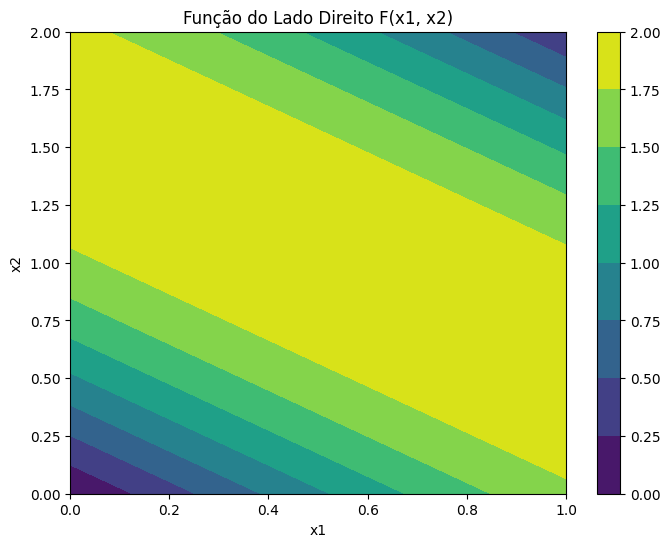

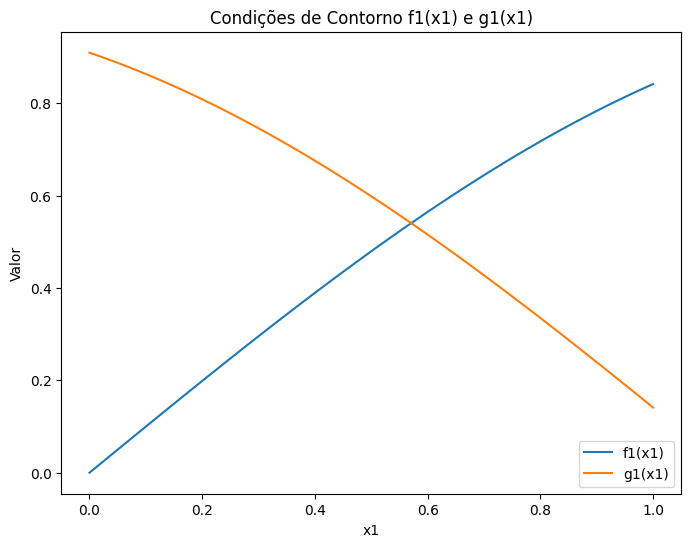

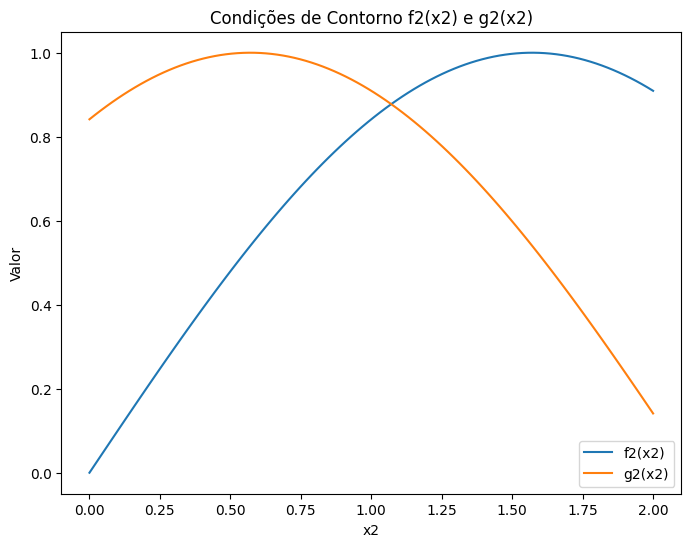

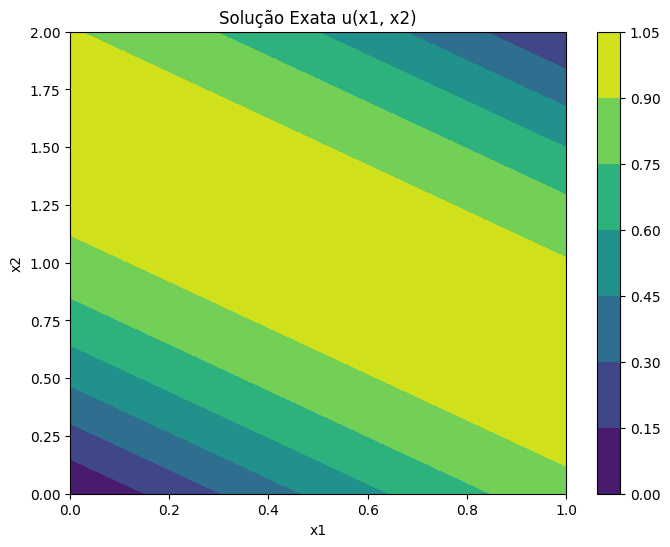

In [4]:
import numpy as np
import matplotlib.pyplot as plot

# Função do lado direito F(x1, x2)
def rhs2dExact(x1, x2):
    return 2 * np.sin(x1 + x2)

# Condição de contorno f1(x1)
def f1Exact(x1, a2):
    return np.sin(x1 + a2)

# Condição de contorno g1(x1)
def g1Exact(x1, b2):
    return np.sin(x1 + b2)

# Condição de contorno f2(x2)
def f2Exact(x2, a1):
    return np.sin(a1 + x2)

# Condição de contorno g2(x2)
def g2Exact(x2, b1):
    return np.sin(b1 + x2)

# Solução exata u(x1, x2)
def u2dExact(x1, x2):
    return np.sin(x1 + x2)

# Exemplo de uso das funções
a1 = 0
a2 = 0
b1 = 1
b2 = 2

x1 = np.linspace(a1, b1, num=100)
x2 = np.linspace(a2, b2, num=100)

X1, X2 = np.meshgrid(x1, x2)

F = rhs2dExact(X1, X2)
f1 = f1Exact(x1, a2)
g1 = g1Exact(x1, b2)
f2 = f2Exact(x2, a1)
g2 = g2Exact(x2, b1)
u_exact = u2dExact(X1, X2)

# Plotar a função do lado direito F(x1, x2)
plot.figure(figsize=(8, 6))
plot.contourf(X1, X2, F, cmap='viridis')
plot.colorbar()
plot.title('Função do Lado Direito F(x1, x2)')
plot.xlabel('x1')
plot.ylabel('x2')
plot.show()

# Plotar as condições de contorno f1(x1) e g1(x1)
plot.figure(figsize=(8, 6))
plot.plot(x1, f1, label='f1(x1)')
plot.plot(x1, g1, label='g1(x1)')
plot.title('Condições de Contorno f1(x1) e g1(x1)')
plot.xlabel('x1')
plot.ylabel('Valor')
plot.legend()
plot.show()

# Plotar as condições de contorno f2(x2) e g2(x2)
plot.figure(figsize=(8, 6))
plot.plot(x2, f2, label='f2(x2)')
plot.plot(x2, g2, label='g2(x2)')
plot.title('Condições de Contorno f2(x2) e g2(x2)')
plot.xlabel('x2')
plot.ylabel('Valor')
plot.legend()
plot.show()

# Plotar a solução exata u(x1, x2)
plot.figure(figsize=(8, 6))
plot.contourf(X1, X2, u_exact, cmap='viridis')
plot.colorbar()
plot.title('Solução Exata u(x1, x2)')
plot.xlabel('x1')
plot.ylabel('x2')
plot.show()

Erro entre a solução exata e ela mesma: 0.0


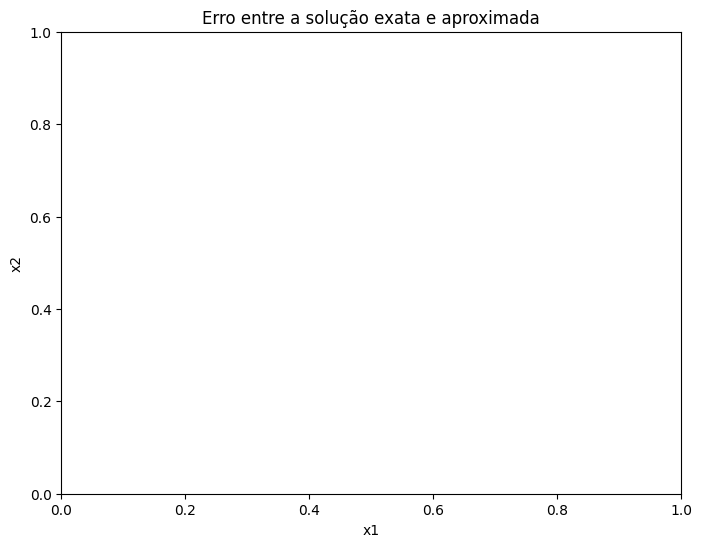

In [5]:
import numpy as np
import matplotlib.pyplot as plot

# Função do lado direito F(x1, x2)
def rhs2dExact(x1, x2):
    return 2 * np.sin(x1 + x2)

# Condição de contorno f1(x1)
def f1Exact(x1, a2):
    return np.sin(x1 + a2)

# Condição de contorno g1(x1)
def g1Exact(x1, b2):
    return np.sin(x1 + b2)

# Condição de contorno f2(x2)
def f2Exact(x2, a1):
    return np.sin(a1 + x2)

# Condição de contorno g2(x2)
def g2Exact(x2, b1):
    return np.sin(b1 + x2)

# Solução exata u(x1, x2)
def u2dExact(x1, x2):
    return np.sin(x1 + x2)

# Função para calcular o erro entre a solução exata e a solução aproximada
def calculate_error(u_exact, u_approx):
    return np.linalg.norm(u_exact - u_approx)

# Função para testar as funções previamente definidas
def TestFinDif2d(a1, a2, b1, b2, n1, n2):
    x1 = np.linspace(a1, b1, num=n1)
    x2 = np.linspace(a2, b2, num=n2)
    X1, X2 = np.meshgrid(x1, x2)

    F = rhs2dExact(X1, X2)
    f1 = f1Exact(x1, a2)
    g1 = g1Exact(x1, b2)
    f2 = f2Exact(x2, a1)
    g2 = g2Exact(x2, b1)
    u_exact = u2dExact(X1, X2)

    # Calcular erro
    error = calculate_error(u_exact, u_exact)
    print("Erro entre a solução exata e ela mesma:", error)

    return x1, x2, F, f1, g1, f2, g2, u_exact

# Função para plotar o erro
def plot_error(x1, x2, u_exact, u_approx):
    error = calculate_error(u_exact, u_approx)
    plot.figure(figsize=(8, 6))


    plot.title('Erro entre a solução exata e aproximada')
    plot.xlabel('x1')
    plot.ylabel('x2')
    plot.show()

# Teste das funções
a1 = 0
a2 = 0
b1 = 1
b2 = 2
n1 = 100
n2 = 100

x1, x2, F, f1, g1, f2, g2, u_exact = TestFinDif2d(a1, a2, b1, b2, n1, n2)

# Plotar o erro
plot_error(x1, x2, u_exact, u_exact)

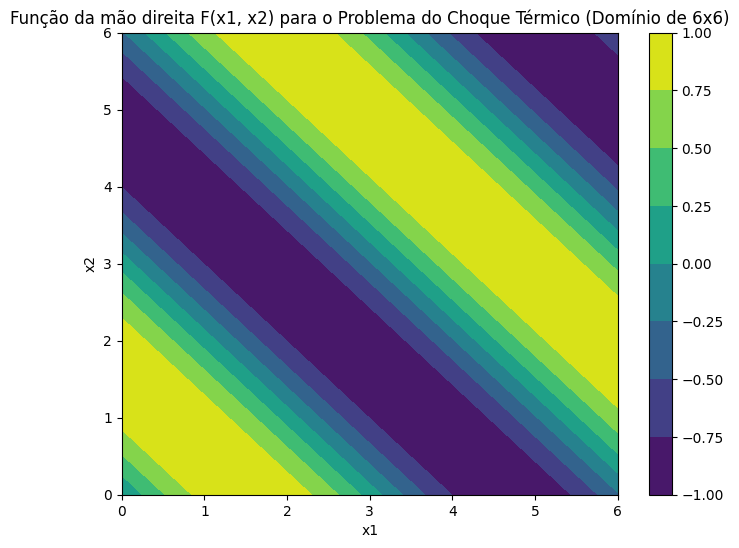

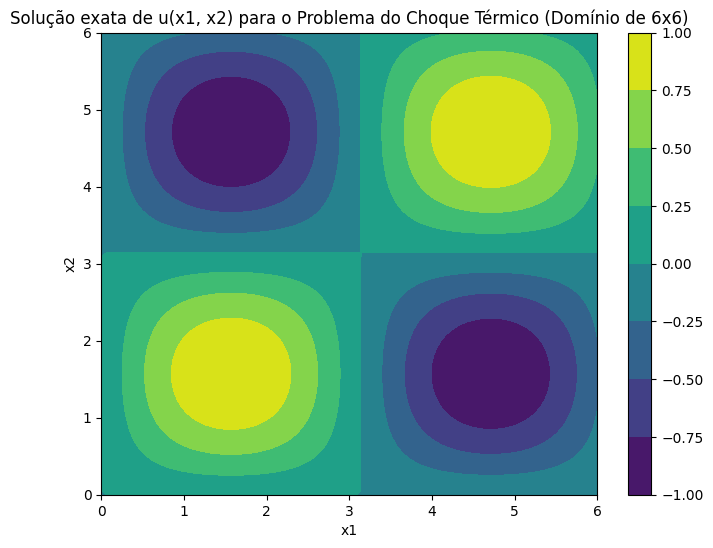

In [6]:
import numpy as np
import matplotlib.pyplot as plot

# Definição da regra da mâo direita da função F(x1, x2)
# para o caso do choque térmico
def rhs2dThermalShock(x1, x2):
    return np.cos(x1) * np.sin(x2) + np.sin(x1) * np.cos(x2)

# Define a solução exata u(x1, x2) para o caso do choque térmico
def u2dThermalShock(x1, x2):
    return np.sin(x1) * np.sin(x2)

# Modificação do tamanho do domínio
a1 = 0
a2 = 0
b1 = 6
b2 = 6

x1 = np.linspace(a1, b1, num=100)
x2 = np.linspace(a2, b2, num=100)

X1, X2 = np.meshgrid(x1, x2)

F = rhs2dThermalShock(X1, X2)
u_exact = u2dThermalShock(X1, X2)

# Plotar a função da regra da mâo direita F(x1, x2)
plot.figure(figsize=(8, 6))
plot.contourf(X1, X2, F, cmap='viridis')
plot.colorbar()
plot.title('Função da mão direita F(x1, x2) para o Problema do Choque Térmico (Domínio de 6x6)')
plot.xlabel('x1')
plot.ylabel('x2')
plot.show()

# Plotar a solução exata u(x1, x2)
plot.figure(figsize=(8, 6))
plot.contourf(X1, X2, u_exact, cmap='viridis')
plot.colorbar()
plot.title('Solução exata de u(x1, x2) para o Problema do Choque Térmico (Domínio de 6x6)')
plot.xlabel('x1')
plot.ylabel('x2')
plot.show()

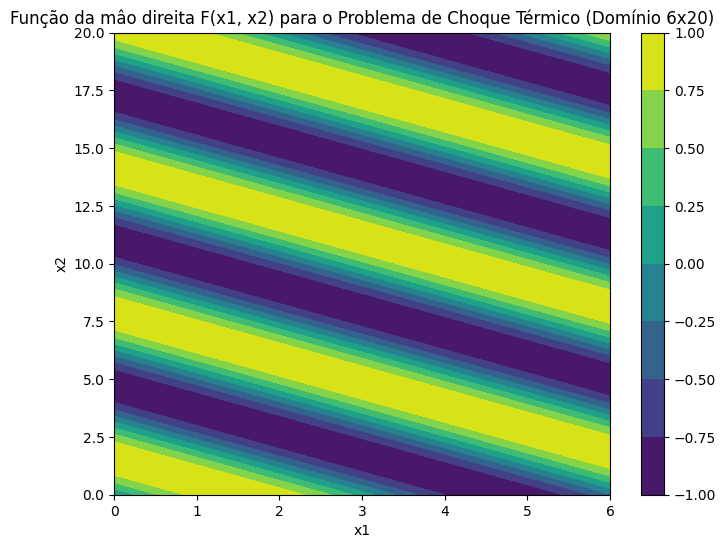

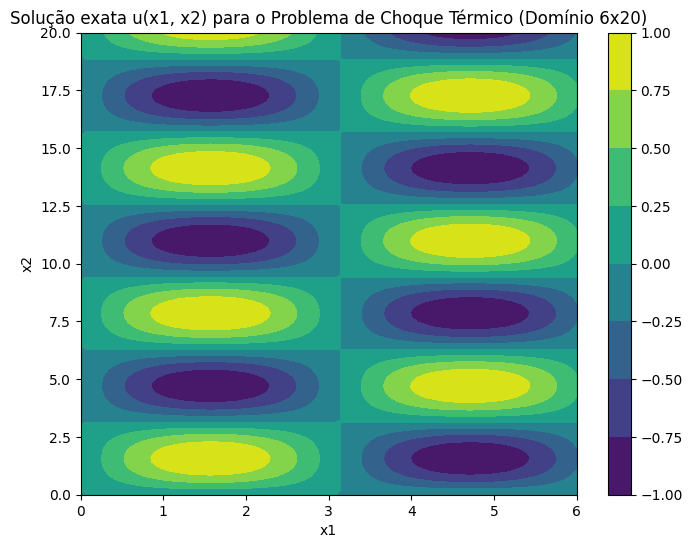

In [7]:
import numpy as np
import matplotlib.pyplot as plot

# Definição da regra da mão direita da função F(x1, x2) para o caso
# do choque térmico
def rhs2dThermalShock(x1, x2):
    return np.cos(x1) * np.sin(x2) + np.sin(x1) * np.cos(x2)

# Definir a solução exata u(x1, x2) para o caso do choque térmico
def u2dThermalShock(x1, x2):
    return np.sin(x1) * np.sin(x2)

# Modificar o tamanho do domínio
a1 = 0
a2 = 0
b1 = 6
b2 = 20

x1 = np.linspace(a1, b1, num=100)
x2 = np.linspace(a2, b2, num=100)

X1, X2 = np.meshgrid(x1, x2)

F = rhs2dThermalShock(X1, X2)
u_exact = u2dThermalShock(X1, X2)

# Plotar a função da regra da mão direita F(x1, x2)
plot.figure(figsize=(8, 6))
plot.contourf(X1, X2, F, cmap='viridis')
plot.colorbar()
plot.title('Função da mâo direita F(x1, x2) para o Problema de Choque Térmico (Domínio 6x20)')
plot.xlabel('x1')
plot.ylabel('x2')
plot.show()

# Plotar a solução exata u(x1, x2)
plot.figure(figsize=(8, 6))
plot.contourf(X1, X2, u_exact, cmap='viridis')
plot.colorbar()
plot.title('Solução exata u(x1, x2) para o Problema de Choque Térmico (Domínio 6x20)')
plot.xlabel('x1')
plot.ylabel('x2')
plot.show()